#Importing Libraries

In [ ]:
import numpy as np
#import pickle
import cv2
import os
from os import listdir
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
#from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D
from keras.layers import Conv2D,Lambda
from keras.layers import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
#from keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from numpy import expand_dims
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
#from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
#from torchvision import datasets, transforms, models
#from imutils import paths
#from keras.wrappers.scikit_learn import KerasRegressor
import glob
import tensorflow as tf 

In [ ]:
tf.compat.v1.reset_default_graph
EPOCHS = 10
INIT_LR = 1e-3
batch_size = 32
img_rows, img_cols = 256, 256
# img_rows, img_cols = 120, 120
input_shape = (img_rows, img_cols, 3)
#image_size = 0
#directory_root = 'riceleafdataset'
#width=256
#height=256
#depth=1

# Train/Test dataset split

In [ ]:
data=[]
label_list = []
for filename in glob.glob('/content/drive/MyDrive/Colab Notebooks/PRL/Final_Project/dataset/Flowers/*/*.jpg'):
   #print(filename)
  print(os.path.basename(filename))
  only_file_name = os.path.basename(filename)## hispa_2_output.jpg
  train_img_label = only_file_name.split('_')[0]
  img = load_img(filename,target_size=(256, 256))

  img1 = img_to_array(img)
  data.append(img1)
  label_list.append(train_img_label)
    
np_data = np.array(data, dtype=np.float16)/255.0
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

gardenias_00020.jpg
gardenias_00021.jpg
gardenias_00009.jpg
gardenias_00016.jpg
gardenias_00014.jpg
gardenias_00015.jpg
gardenias_00010.jpg
gardenias_00019.jpg
gardenias_00012.jpg
gardenias_00018.jpg
gardenias_00004.jpg
gardenias_00006.jpg
gardenias_00003.jpg
gardenias_00007.jpg
gardenias_00013.jpg
gardenias_00022.jpg
gardenias_00002.jpg
gardenias_00008.jpg
gardenias_00011.jpg
gardenias_00005.jpg
tulip_00002.jpg
tulip_00003.jpg
tulip_00006.jpg
tulip_00008.jpg
tulip_00005.jpg
tulip_00007.jpg
tulip_00009.jpg
tulip_00004.jpg
tulip_00011.jpg
tulip_00014.jpg
tulip_00018.jpg
tulip_00021.jpg
tulip_00017.jpg
tulip_00019.jpg
tulip_00013.jpg
tulip_00012.jpg
tulip_00016.jpg
tulip_00020.jpg
tulip_00015.jpg
tulip_00010.jpg
orchids_00008.jpg
orchids_00005.jpg
orchids_00011.jpg
orchids_00012.jpg
orchids_00010.jpg
orchids_00006.jpg
orchids_00007.jpg
orchids_00004.jpg
orchids_00009.jpg
orchids_00022.jpg
orchids_00021.jpg
orchids_00020.jpg
orchids_00017.jpg
orchids_00014.jpg
orchids_00018.jpg
orchids_00

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_data, image_labels, test_size=0.30, random_state = 0) 
classifier = Sequential()
#rbm = BernoulliRBM(random_state=0, verbose=True)

chanDim = -1

In [ ]:
#step - 1 - Convolution
classifier.add(Convolution2D(16, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Convolution2D(32, (3, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Convolution2D(64, (3, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(5))
classifier.add(Activation('softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 activation_5 (Activation)   (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 activation_6 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

# Compiling the CNN

In [ ]:
# Compiling the CNN
classifier.compile(
    # optimizer='adam',
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    # loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Epoch Results

In [ ]:
# hist=classifier.fit( x_train,y_train,batch_size=32,verbose=1,nb_epoch=5,validation_data=(x_test,y_test))
hist = classifier.fit(x_train,y_train,batch_size=batch_size,epochs=EPOCHS,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 2.9467 - accuracy: 0.2286 - val_loss: 2.0418 - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 1.7767 - accuracy: 0.2286 - val_loss: 1.4759 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 1.3548 - accuracy: 0.4286 - val_loss: 1.7654 - val_accuracy: 0.4000
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 1.4155 - accuracy: 0.5000 - val_loss: 1.4912 - val_accuracy: 0.3000
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 1.3384 - accuracy: 0.5000 - val_loss: 1.1946 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.8980 - accuracy: 0.6000 - val_loss: 1.5604 - val_accuracy: 0.4667
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.8284 - accuracy: 0.6429 - val_loss: 1.2445 - val_accuracy: 0.5667
Epoch 8/10
3/3 [=========================

# Confusion Matrix

In [ ]:
#confusion_matrics
Y_pred = classifier.predict(x_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
target_names = ['class 0(bougainvillea)', 'class 1(gardenias)', 'class 2(hibiscus)','class 3(orchids)','class 4(tulip)']


# Prediction and classification_report

In [ ]:
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

                        precision    recall  f1-score   support

class 0(bougainvillea)       0.67      1.00      0.80         6
    class 1(gardenias)       0.88      1.00      0.93         7
     class 2(hibiscus)       0.40      0.33      0.36         6
      class 3(orchids)       0.50      0.33      0.40         6
        class 4(tulip)       0.50      0.40      0.44         5

              accuracy                           0.63        30
             macro avg       0.59      0.61      0.59        30
          weighted avg       0.60      0.63      0.60        30



# Plot_confusion_matrix

In [ ]:
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

[[6 0 0 0 0]
 [0 7 0 0 0]
 [1 0 2 2 1]
 [2 0 1 2 1]
 [0 1 2 0 2]]


In [ ]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Plot non-normalized confusion matrix

Confusion matrix, without normalization
[[6 0 0 0 0]
 [0 7 0 0 0]
 [1 0 2 2 1]
 [2 0 1 2 1]
 [0 1 2 0 2]]


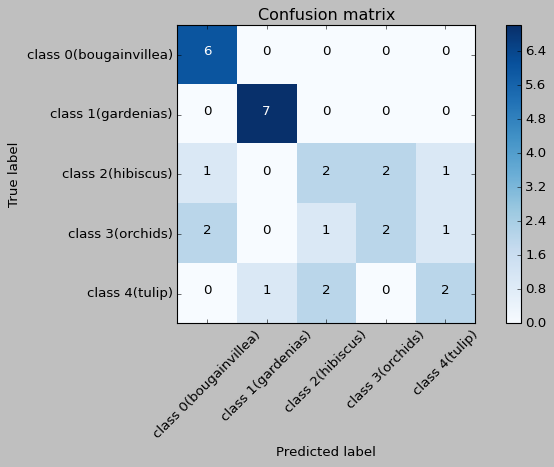

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

# Plot Diagram

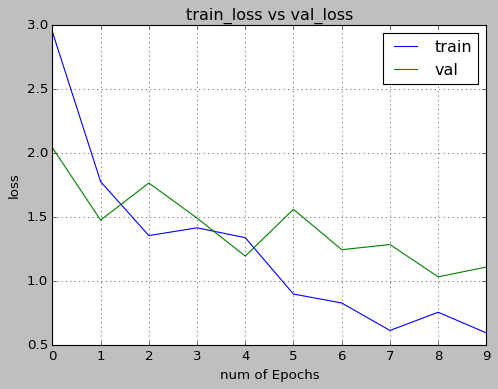

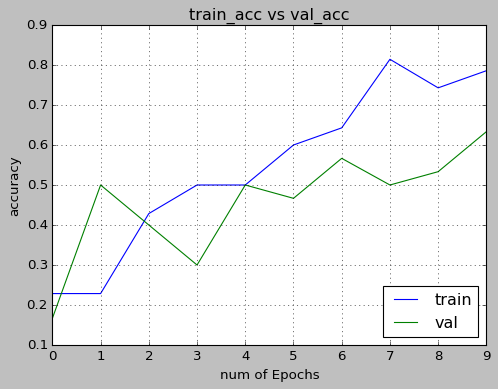

In [ ]:
plt.show()
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(10)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


(1, 256, 256, 3)


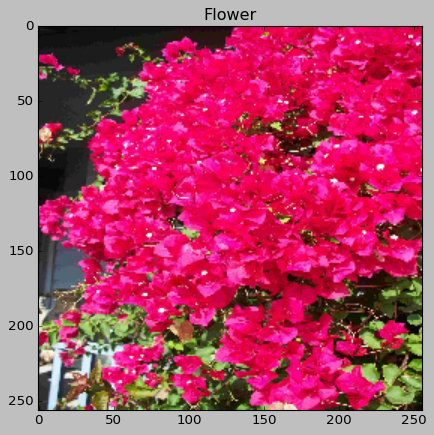

[[1. 0. 0. 0. 0.]]


In [ ]:
##load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/PRL/Final_Project/dataset/Flowers/bougainvillea/bougainvillea_00010.jpg', target_size=(256, 256))
# convert the image to an array
img1 = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img1 = expand_dims(img1, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img1 = img1/255.0
plt.show()
print(img1.shape)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes1 = classifier.predict(images, batch_size=32)
imgplot = plt.imshow(img)
plt.title('Flower')
plt.show()
print(classes1)